# Titanic: Machine Learning from Disaster

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

# Get the Data

In [3]:
#train data 
train = pd.read_csv('titanic_train.csv')
train['label']="train"
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
label          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [4]:
#test data 
test = pd.read_csv('titanic_test.csv')
test['label']="test"
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
label          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,label
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test


In [5]:
#full dataset
df = pd.concat([train,test],axis=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
label          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,label
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


# Missing Value

In [6]:
#Age - function of Pclass and Sex
temp = df[pd.isnull(df['Age']) == False]
age = temp.pivot_table(values=['Age'], index=['Pclass'], columns=['Sex'], aggfunc='mean')

def func_age (cols):
    x = cols[0]
    y = cols[1]
    z = cols[2]
    if (pd.isnull(x)==False): return x
    elif (y==1 and z=='female'): return 37.0
    elif (y==2 and z=='female'): return 27.5
    elif (y==3 and z=='female'): return 22.2
    elif (y==1 and z=='male'): return 41.0
    elif (y==2 and z=='male'): return 30.8
    elif (y==3 and z=='male'): return 26.0
    else: return x
df['Age'] = df[['Age','Pclass','Sex']].apply(func_age,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
label          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [7]:
#Cabin - flag (Not Known/ Known)
def func_cabin (x):
    if (pd.isnull(x) == True): return 0
    else: return 1
df['Cabin_Known'] = df['Cabin'].apply(func_cabin)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
label          1309 non-null object
Cabin_Known    1309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [8]:
#Embarked - By max count i.e. "S"
embarked = df.groupby(['Embarked'], axis=0)['Embarked'].count()

def func_embarked (x):
    if (pd.isnull(x) == True): return "S"
    else: return x
df['Embarked'] = df['Embarked'].apply(func_embarked)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
label          1309 non-null object
Cabin_Known    1309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [9]:
#Fare - By mean i.e. 33.3
fare = df['Fare'].mean()

def func_fare (x):
    if (pd.isnull(x) == True): return 33.3
    else: return x
df['Fare'] = df['Fare'].apply(func_fare)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
label          1309 non-null object
Cabin_Known    1309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


# Exploratory Data Analysis - Categorical

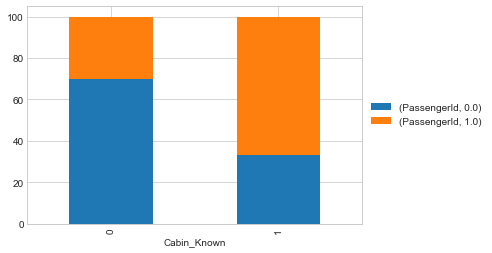

In [10]:
#Cabin_Known (use Cabin_Known)
temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['Cabin_Known'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

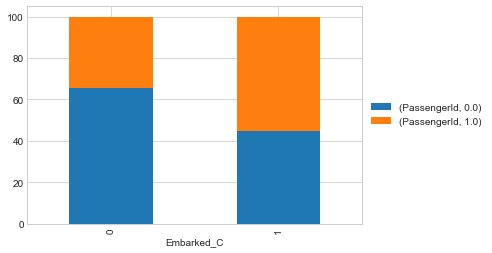

In [11]:
#Embarked (use Embarked_C)
def func_embarked (x):
    if (x == 'C'): return 1
    else: return 0
df['Embarked_C'] = df['Embarked'].apply(func_embarked)

temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['Embarked_C'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

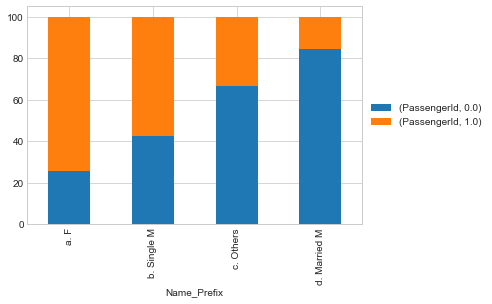

In [12]:
#Name (use Name_Prefix)
def func_name(x):
    y = x.split()[1]
    if (y == 'Mrs.'): return "a. F"
    elif (y == 'Mr.'): return "d. Married M"
    elif (y == 'Miss.'): return "a. F"
    elif (y == 'Ms.'): return "a. F"
    elif (y == 'Master.'): return "b. Single M"
    else: return "c. Others"
df['Name_Prefix']=df['Name'].apply(func_name)

temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['Name_Prefix'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

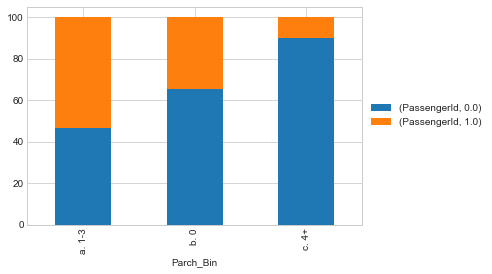

In [13]:
#Parch (use Parch_Bin)
def func_Parch(x):
    if (x == 0): return "b. 0"
    elif (x >= 1 and x<=3): return "a. 1-3"
    else: return "c. 4+"
df['Parch_Bin']=df['Parch'].apply(func_Parch)
    
temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['Parch_Bin'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

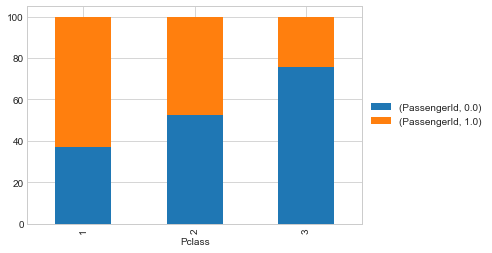

In [14]:
#Pclass (use Pclass)
temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['Pclass'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

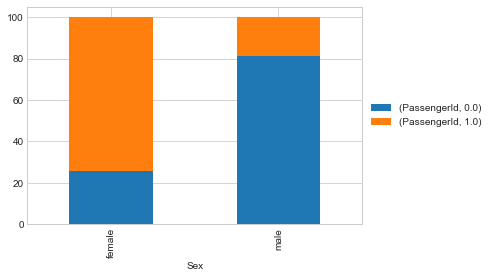

In [15]:
#Sex (use Sex)
temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['Sex'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

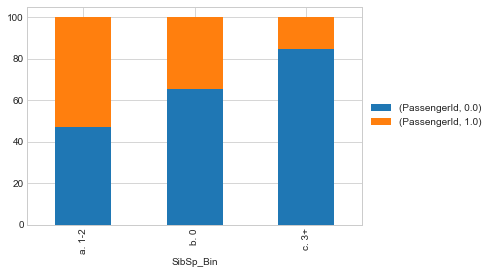

In [16]:
#SibSp (use SibSp_Bin)
def func_SibSp(x):
    if (x == 0): return "b. 0"
    elif (x >= 1 and x<=2): return "a. 1-2"
    else: return "c. 3+"
df['SibSp_Bin']=df['SibSp'].apply(func_SibSp)
    
temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['SibSp_Bin'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Exploratory Data Analysis - Numerical

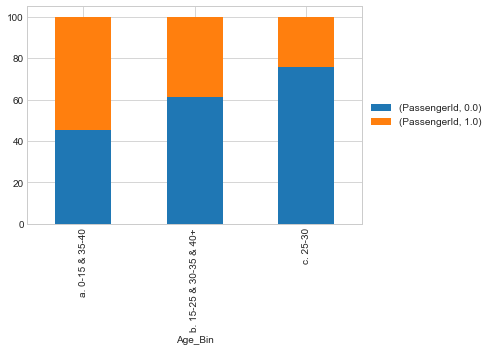

In [17]:
#Age (use Age_Bin)
temp = np.percentile(df['Age'], np.arange(0, 101, 10))

def func_age (x):
    if x < 15: return "a. 0-15 & 35-40"
    elif x < 25: return "b. 15-25 & 30-35 & 40+"
    elif x < 30: return "c. 25-30"
    elif x < 35: return "b. 15-25 & 30-35 & 40+"
    elif x < 40: return "a. 0-15 & 35-40"
    else: return "b. 15-25 & 30-35 & 40+"
df['Age_Bin'] = df['Age'].apply(func_age)

temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['Age_Bin'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

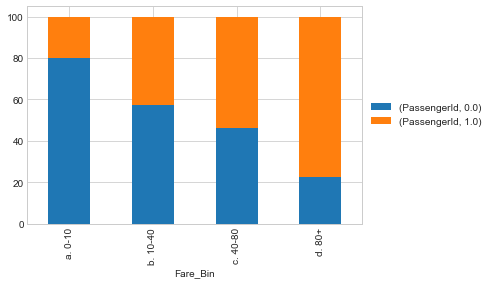

In [18]:
#Fare (use Fare_Bin)
temp = np.percentile(df['Fare'], np.arange(0, 101, 10))

def func_Fare (x):
    if x < 10: return "a. 0-10"
    elif x < 40: return "b. 10-40"
    elif x < 80: return "c. 40-80"
    else: return "d. 80+"
df['Fare_Bin'] = df['Fare'].apply(func_Fare)

temp = df[df['label']=='train']
x_chart = temp.pivot_table(values=['PassengerId'], index=['Fare_Bin'], columns=['Survived'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Train Test Split

In [19]:
#Cleaning dataset and getting the dummies
#temp = df[['PassengerId','Age_Bin','Fare_Bin','Cabin_Known','Embarked_C','Name_Prefix','Parch_Bin','Pclass','Sex','SibSp_Bin','Survived','label']]
#temp = df[['PassengerId','Age_Bin','Cabin_Known','Embarked_C','Name_Prefix','Parch_Bin','Pclass','Sex','SibSp_Bin','Survived','label']]
#temp = df[['PassengerId','Cabin_Known','Embarked_C','Name_Prefix','Parch_Bin','Pclass','Sex','SibSp_Bin','Survived','label']]
#temp = df[['PassengerId','Cabin_Known','Embarked_C','Name_Prefix','Parch_Bin','Pclass','SibSp_Bin','Survived','label']]
temp = df[['PassengerId','Cabin_Known','Embarked_C','Name_Prefix','Pclass','SibSp_Bin','Survived','label']]

#cat_feats = ['Age_Bin','Fare_Bin','Name_Prefix','Parch_Bin','Pclass','Sex','SibSp_Bin']
#cat_feats = ['Age_Bin','Name_Prefix','Parch_Bin','Pclass','Sex','SibSp_Bin']
#cat_feats = ['Name_Prefix','Parch_Bin','Pclass','Sex','SibSp_Bin']
#cat_feats = ['Name_Prefix','Parch_Bin','Pclass','SibSp_Bin']
cat_feats = ['Name_Prefix','Pclass','SibSp_Bin']

final_data = pd.get_dummies(temp,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId                 1309 non-null int64
Cabin_Known                 1309 non-null int64
Embarked_C                  1309 non-null int64
Survived                    891 non-null float64
label                       1309 non-null object
Name_Prefix_b. Single M     1309 non-null uint8
Name_Prefix_c. Others       1309 non-null uint8
Name_Prefix_d. Married M    1309 non-null uint8
Pclass_2                    1309 non-null uint8
Pclass_3                    1309 non-null uint8
SibSp_Bin_b. 0              1309 non-null uint8
SibSp_Bin_c. 3+             1309 non-null uint8
dtypes: float64(1), int64(3), object(1), uint8(7)
memory usage: 70.3+ KB


In [20]:
#Splitting the data into a train and test set 
df_train = final_data[final_data['label']=='train'].copy()
df_test = final_data[final_data['label']=='test'].copy()
df_test.drop(['Survived','label'],axis=1,inplace=True)

x = df_train.drop(['PassengerId','Survived','label'],axis=1)
y = df_train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# Building the Model

In [21]:
#Train and fit a logistic regression model on the training set.
x_train = sm.add_constant(x_train).copy()
logit = sm.Logit(y_train, x_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.407051
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                            9
Date:                Sun, 29 Oct 2017   Pseudo R-squ.:                  0.3802
Time:                        02:53:38   Log-Likelihood:                -253.59
converged:                       True   LL-Null:                       -409.17
                                        LLR p-value:                 1.119e-61
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6642      0.516      3.225      0.001       0.653       2.676
Cabin_Known                  0.9615      0.434      2.215      0.027       0.111       1.812
Embarked_C                   0.5018      0.290      1.729      0.084      -0.067       1.071
Name_Prefix_b. Single M      0.5778      0.622      0.928      0.353      -0.642       1.798
Name_Prefix_c. Others       -2.6605      0.461     -5.777      0.000      -3.563      -1.758
Name_Prefix_d. Married M    -3.1602      0.259    -12.182      0.000      -3.669      -2.652
Pclass_2                    -0.3305      0.483     -0.684      0.494      -1.278       0.617
Pclass_3                    -1.1187      0.460     -2.430      0.015      -2.021      -0.216
SibSp_Bin_b. 0              -0.0641      0.256     -0.250      0.802      -0.566       0.438
SibSp_Bin_c. 3+             -2.4754      0.602     -4.111      0.000      -3.656      -1.295
============================================================================================
"""

# Predictions and Evaluation

In [22]:
#Creating a confusion matrix
x_test = sm.add_constant(x_test).copy()
y_pred = result.predict(x_test)
test_calc = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['Survived'],test_calc['predicted'])
print (df_table)

[[136  18]
 [ 35  79]]


In [23]:
#Performance of the model
print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

accuracy: 0.80223880597
precision: 0.814432989691
recall: 0.69298245614
f1 score:  0.748815165877


# Choosing C

In [26]:
#ADDED: predicted values for the testing data.
predicted = result.predict(x_train)
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_calc = pd.concat([x_train,y_train,pd.DataFrame(predicted)],axis=1)
train_calc.rename(columns={0: 'predicted'}, inplace=True)

max c:  0.45
max a:  0.5


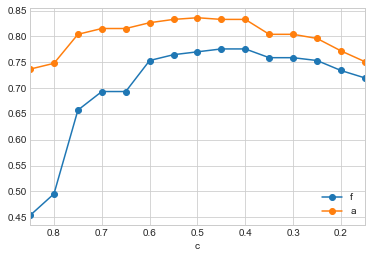

In [27]:
#ADDED: optimizing c value.
c = [0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15]
a = [0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15]
p = [0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15]
r = [0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15]
f = [0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    train_calc['j']=j
    train_calc['flag'] = train_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(train_calc['Survived'],train_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_c = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max c: ",max_c)
print ("max a: ",max_a)

# C = 0.5
##### Metric: Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

In [28]:
#ADDED: final Model
x_test = sm.add_constant(x_test).copy()
y_pred = result.predict(x_test)
test_calc = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['Survived'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[136  18]
 [ 35  79]]
accuracy: 0.80223880597
precision: 0.814432989691
recall: 0.69298245614
f1 score:  0.748815165877


# Final Submission

In [29]:
x_test = sm.add_constant(df_test).drop('PassengerId',axis=1).copy()
y_pred = result.predict(x_test)

test_calc = pd.concat([df_test,pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)
test_calc['Survived'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)

In [30]:
final_sub = test_calc[['PassengerId','Survived']]
final_sub.to_csv('titanic_f2005636.csv', index=False)